<a href="https://colab.research.google.com/github/camulro/Aprendizaje-II/blob/sesi%C3%B3n1/09_Pytorch_DL_Incomes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![IDAL](https://i.imgur.com/tIKXIG1.jpg)  

#<strong>**Máster en Inteligencia Artificial Avanzada y Aplicada  IA^3**</strong>
---


##<center>**Deep learning aplicado a regresión**<center>

# Red neuronal profunda: Census Income Prediction

En este ejercicio vamos a trabajar sonre el conjunto de datos del Census Income dataset disponible en <a href = 'http://archive.ics.uci.edu/ml/datasets/Adult'>UC Irvine Machine Learning Repository</a><br>
El objetivo es determinar si el individuo estudiado gana más de $50K o no basado en un conjunto de variables continuas y categóricas. 

## Conjunto de datos Census Income Dataset

El conjunto completo tiene 48,842 registros. Para este ejercicio hemos reducido el númeri de registros y campos y se han eliminado las entradas con valores nulos. El fichero que se va a emplear consta de 30,000 entradas.

Cada entrada contiene la siguiente información individual:
* <strong>age</strong>: la edad como número entero entre 18 y 90 (continua)
* <strong>sex</strong>: Male (masculino) o Female (femenino) (categórica)
* <strong>education</strong>: nivel más alto de educación recibido (categórica)
* <strong>education_num</strong>: nivel de educación como número de 3 a 16 (categórica)
<div><table style="display: inline-block">
<tr><td>3</td><td>5th-6th</td><td>8</td><td>12th</td><td>13</td><td>Bachelors</td></tr>
<tr><td>4</td><td>7th-8th</td><td>9</td><td>HS-grad</td><td>14</td><td>Masters</td></tr>
<tr><td>5</td><td>9th</td><td>10</td><td>Some-college</td><td>15</td><td>Prof-school</td></tr>
<tr><td>6</td><td>10th</td><td>11</td><td>Assoc-voc</td><td>16</td><td>Doctorate</td></tr>
<tr><td>7</td><td>11th</td><td>12</td><td>Assoc-acdm</td></tr>
</table></div>
* <strong>marital-status</strong>: estado civil (categórica)
<div><table style="display: inline-block">
<tr><td>Married</td><td>Divorced</td><td>Married-spouse-absent</td></tr>
<tr><td>Separated</td><td>Widowed</td><td>Never-married</td></tr>
</table></div>
* <strong>workclass</strong>: término general que representa la situación  laboral (categorica)
<div><table style="display: inline-block">
<tr><td>Local-gov</td><td>Private</td></tr>
<tr><td>State-gov</td><td>Self-emp</td></tr>
<tr><td>Federal-gov</td></tr>
</table></div>
* <strong>occupation</strong>: tipo de ocupación (categórica)
<div><table style="display: inline-block">
<tr><td>Adm-clerical</td><td>Handlers-cleaners</td><td>Protective-serv</td></tr>
<tr><td>Craft-repair</td><td>Machine-op-inspct</td><td>Sales</td></tr>
<tr><td>Exec-managerial</td><td>Other-service</td><td>Tech-support</td></tr>
<tr><td>Farming-fishing</td><td>Prof-specialty</td><td>Transport-moving</td></tr>
</table></div>
* <strong>hours-per-week</strong>: horas que el individuo reporta como trabajadas por semana siendo un entero entre 20 a 90 (continua)
* <strong>income</strong>: valor que indica si supera o  no los ingresos de  \\$50,000 anuales (etiqueta)
* <strong>label</strong>: ingresos anuales en valor numérico (0: <=\\$50K, 1: >\\$50K) (etiqueta opcional)

## Importaciones standard

In [1]:
import torch
import torch.nn as nn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
%matplotlib inline


In [2]:
# Montamos Drive para acceder a los datos_
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datos/income.csv')

In [4]:
print(len(df))
df.head()

30000


,age,sex,education,education-num,marital-status,workclass,occupation,hours-per-week,income,label
0,27,Male,HS-grad,9,Never-married,Private,Craft-repair,40,<=50K,0
1,47,Male,Masters,14,Married,Local-gov,Exec-managerial,50,>50K,1
2,59,Male,HS-grad,9,Divorced,Self-emp,Prof-specialty,20,<=50K,0
3,38,Female,Prof-school,15,Never-married,Federal-gov,Prof-specialty,57,>50K,1
4,64,Female,11th,7,Widowed,Private,Farming-fishing,40,<=50K,0


In [5]:
df['label'].value_counts()

0    21700
1     8300
Name: label, dtype: int64

### Separamos variables categóricas y continuas

Encontramos que hay 5 variables categoricas, 2 continuas y 1 etiqueta (_label_).<br>
En el caso de `education` y `education-num` da igual la que empleemos. Para variable objetivo vamos a emplear la columna `label` y no `income` (es importante no introducir esta variable en modelo!)<br>
Assigna los nombres "cat_cols", "cont_cols" y "y_col" para las listas de nombres. 

In [6]:
df.columns

Index(['age', 'sex', 'education', 'education-num', 'marital-status',
       'workclass', 'occupation', 'hours-per-week', 'income', 'label'],
      dtype='object')

In [7]:

cat_cols = ['sex', 'education', 'marital-status', 'workclass', 'occupation']
cont_cols = ['age', 'hours-per-week']
y_col = ['label']

print(f'cat_cols  has {len(cat_cols)} columns')  # 5
print(f'cont_cols has {len(cont_cols)} columns') # 2
print(f'y_col     has {len(y_col)} column')      # 1

cat_cols  has 5 columns
cont_cols has 2 columns
y_col     has 1 column


### Categorizar

In [8]:

for cat in cat_cols:
    df[cat] = df[cat].astype('category')

### Opcional: Mezclar el dataset
El dataset <strong>income.csv</strong> ya viene mezclado. No obstante si se desean probar configuraciones distintas, el código a continuación poermite que se vuelva a mezclar.

In [9]:
# Opcional, si los valores vienen ordenados por edades... los barajamos
df = shuffle(df, random_state=101)
df.reset_index(drop=True, inplace=True)
df.head()

,age,sex,education,education-num,marital-status,workclass,occupation,hours-per-week,income,label
0,23,Female,HS-grad,9,Never-married,Private,Other-service,50,<=50K,0
1,37,Female,Prof-school,15,Married,State-gov,Prof-specialty,39,>50K,1
2,34,Male,Some-college,10,Divorced,Private,Adm-clerical,40,<=50K,0
3,31,Male,HS-grad,9,Married,Private,Craft-repair,40,>50K,1
4,20,Female,Some-college,10,Never-married,Private,Sales,25,<=50K,0


### 3. Preparar los tamaños para el embedding

Crear una variable "cat_szs" para mantener el número de categorías en cada variable.<br>
Entonces crea una variable "emb_szs" para mantener la lista de tuplas (tamaño de la categoría, tamaño del embedding).

In [10]:

cat_szs = [len(df[col].cat.categories) for col in cat_cols]
emb_szs = [(size, min(50, (size+1)//2)) for size in cat_szs]
emb_szs

[(2, 1), (14, 7), (6, 3), (5, 3), (12, 6)]

### 4. Creación de array de valores categóricos

Creamos un arrayNumPy llamado "cats" que contiene el apilado (_stack_) de cada columna categórica<tt>.cat.codes.values</tt><br>
Nota: La salidas pueden diferir en función de si se ha realizdo la mezcla de los registros especificada anterioormente. 

In [11]:
sx = df['sex'].cat.codes.values
ed = df['education'].cat.codes.values #no coge education numero
ms = df['marital-status'].cat.codes.values
wc = df['workclass'].cat.codes.values
oc = df['occupation'].cat.codes.values

cats = np.stack([sx,ed,ms,wc,oc], 1)

cats[:5]

array([[ 0, 10,  3,  2,  6],
       [ 0, 12,  1,  4,  7],
       [ 1, 13,  0,  2,  0],
       [ 1, 10,  1,  2,  1],
       [ 0, 13,  3,  2,  9]], dtype=int8)

### 5. Convertimos "cats"  a tensor
Convert the "cats" NumPy array to a tensor of dtype <tt>int64</tt>

In [12]:
cats = torch.tensor(cats, dtype=torch.int64)

### 6. Creación de array de valores continuos


In [13]:

conts = np.stack([df[col].values for col in cont_cols], 1)
conts[:5]

array([[23, 50],
       [37, 39],
       [34, 40],
       [31, 40],
       [20, 25]])

### 7. Conversión de numpy arrays a tensores
Convertimos el array Numpy "conts"a tensor de dtype <tt>float32</tt>

In [14]:
conts = torch.tensor(conts, dtype=torch.float)
conts.dtype

torch.float32

### 8. Convertimos las etiquetas a tensor
Creamos un tensor llamado "y" con los valores de la columna `label`. 

Es necesario extender el tensor para que pueda ser pasado a la función de Entropía cruzada que vamos a emplear.

In [15]:
y = torch.tensor(df[y_col].values).flatten()

### 9. Preparamos conjuntos de train/test

Vamos a emplear un solo lote de 30000 registros. Lotes más pequeños ayudarán con un menor tiempo en el entrenamiento.<br> 
Para test vamos a emplear 5,000 registros, aunque se puede escoger cualquier otro valor o porcentaje del total del lote.<br>
Hay que asegurar que el conjunto de test queda separado del de entrenamiento. <br>
Por simplicidad en el código, vamos a llamar "b" (batch size) y "t" (test).

In [16]:
b = 30000 # suggested batch size
t = 5000  # suggested test size

cat_train = cats[:b-t]
cat_test  = cats[b-t:b]
con_train = conts[:b-t]
con_test  = conts[b-t:b]
y_train   = y[:b-t]
y_test    = y[b-t:b]

In [17]:
len(cat_train)

25000

### Definiendo la clase del modelo


In [18]:
class TabularModel(nn.Module):

    def __init__(self, emb_szs, n_cont, out_sz, layers, p=0.5):
        super().__init__()
        self.embeds = nn.ModuleList([nn.Embedding(ni, nf) for ni,nf in emb_szs])
        self.emb_drop = nn.Dropout(p)
        self.bn_cont = nn.BatchNorm1d(n_cont)
        
        layerlist = []
               
        n_emb = sum((nf for ni,nf in emb_szs))
        n_in = n_emb + n_cont
                
        for i in layers:
            layerlist.append(nn.Linear(n_in,i)) 
            layerlist.append(nn.ReLU(inplace=True))
            layerlist.append(nn.BatchNorm1d(i))
            layerlist.append(nn.Dropout(p))
            n_in = i
        layerlist.append(nn.Linear(layers[-1],out_sz))
                
        self.layers = nn.Sequential(*layerlist)
    
    def forward(self, x_cat, x_cont):
        embeddings = []
        for i,e in enumerate(self.embeds):
            embeddings.append(e(x_cat[:,i]))
        x = torch.cat(embeddings, 1)
        x = self.emb_drop(x)
        
        x_cont = self.bn_cont(x_cont)
        x = torch.cat([x, x_cont], 1) #unifica continuas y categoricas
        
        x = self.layers(x)
        return x

### 10. Configuramos la semilla del generador aleatorio

Para obtener resultados reproducbles, establece una semilla de 33.

In [19]:
torch.manual_seed(33)

### 11. Creamos la instancia de TabularModel 
Empieza por crear una instancia llamada `model` dcon una capa pculta de 50 neuronas y un factor de dropout de 0.4. 

In [20]:
model = TabularModel(emb_szs, conts.shape[1], 2, [50], p=0.4)
model

TabularModel(
  (embeds): ModuleList(
    (0): Embedding(2, 1)
    (1): Embedding(14, 7)
    (2): Embedding(6, 3)
    (3): Embedding(5, 3)
    (4): Embedding(12, 6)
  )
  (emb_drop): Dropout(p=0.4, inplace=False)
  (bn_cont): BatchNorm1d(2, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=22, out_features=50, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=50, out_features=2, bias=True)
  )
)

### 12. Definimos función de coste y optimización


In [21]:
criterion = nn.CrossEntropyLoss() #entropia cruzada porque estamos en un ejercicio de clasificación
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

### Entrenamiento
Empieza por entrenar 300 epochs. 
Una vez terminado el ejercicio, puedes volver a reconfigurar parámetros y reentrenar el modelo para intentar mejores resultados.

In [22]:
import time
start_time = time.time()

epochs = 300
losses = []

for i in range(epochs):
    i+=1
    y_pred = model(cat_train, con_train)
    loss = criterion(y_pred, y_train)
    losses.append(loss)
    
    # log:
    if i%25 == 1:
        print(f'epoch: {i:3}  loss: {loss.item():10.8f}')

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

print(f'epoch: {i:3}  loss: {loss.item():10.8f}') # print the last line
print(f'\nDuration: {time.time() - start_time:.0f} seconds') # print the time elapsed

epoch:   1  loss: 0.81377244
epoch:  26  loss: 0.59307504
epoch:  51  loss: 0.51390415
epoch:  76  loss: 0.46117675
epoch: 101  loss: 0.42819566
epoch: 126  loss: 0.39755720
epoch: 151  loss: 0.38082346
epoch: 176  loss: 0.35858539
epoch: 201  loss: 0.34402433
epoch: 226  loss: 0.33575067
epoch: 251  loss: 0.32718167
epoch: 276  loss: 0.32315749
epoch: 300  loss: 0.31617415

Duration: 17 seconds


### 13. Visualizamos la función de error 


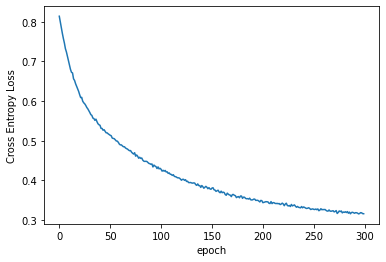

In [ ]:
plt.plot(range(epochs), losses)
plt.ylabel('Cross Entropy Loss')
plt.xlabel('epoch');

### 14. Validamos el modelo
Ahora vamos a lanzar el modelo con el conjunto de test y a comparar los resultados con las etiquetas conocidas. 

Dado que en este paso no es necesario actualizar pesos ni biases, no es necesario emplear la función autograd, por lo que ponemos <tt>torch.no_grad()</tt> y evitamos cálculos (y tiempo ) innecesario.

In [23]:
with torch.no_grad():
    y_val = model(cat_test, con_test)
    loss = criterion(y_val, y_test)
print(f'CE Loss: {loss:.8f}')

CE Loss: 0.33355570


### 15. Calculamos el acierto total
Usando un bucle for, comparamos el valor más alto de las dos salidas <tt>y_val</tt> con cada <tt>y_test</tt>

In [24]:
rows = len(y_test)
correct = 0

# print(f'{"MODEL OUTPUT":26} ARGMAX  Y_TEST')

for i in range(rows):
    # print(f'{str(y_val[i]):26} {y_val[i].argmax().item():^7}{y_test[i]:^7}')

    if y_val[i].argmax().item() == y_test[i]:
        correct += 1

print(y_val[i])
print(f'\n{correct} out of {rows} = {100*correct/rows:.2f}% correct') #promedia los que han acertado sobre los totales

tensor([-0.3006,  0.8212])

4224 out of 5000 = 84.48% correct


### BONUS: Introduce nuevos datos al modelo

De forma similar a los ejercicios anteriores, podemos escribir una función que permita al usuario introducir datos de un individuo y generar una predicción.



In [25]:
def test_data(mdl): # pasamos el nombre del modelo
    # Entrada de datos
    age = float(input("Introduce edad (18-90)  "))
    sex = input("Introduce sexo (Male/Female) ").capitalize()
    edn = int(input("Introduce nivel educativo (3-16) "))
    mar = input("Introduce estado civil ").capitalize()
    wrk = input("Introduce tipo de régimen laboral").capitalize()
    occ = input("Introduce ocupación ").capitalize()
    hrs = float(input("¿Cuantas horas trabaja a la semana? (20-90)  "))

    # Preprocesado 
    sex_d = {'Female':0, 'Male':1}
    mar_d = {'Divorced':0, 'Married':1, 'Married-spouse-absent':2, 'Never-married':3, 'Separated':4, 'Widowed':5}
    wrk_d = {'Federal-gov':0, 'Local-gov':1, 'Private':2, 'Self-emp':3, 'State-gov':4}
    occ_d = {'Adm-clerical':0, 'Craft-repair':1, 'Exec-managerial':2, 'Farming-fishing':3, 'Handlers-cleaners':4,
            'Machine-op-inspct':5, 'Other-service':6, 'Prof-specialty':7, 'Protective-serv':8, 'Sales':9, 
            'Tech-support':10, 'Transport-moving':11}

    sex = sex_d[sex]
    mar = mar_d[mar]
    wrk = wrk_d[wrk]
    occ = occ_d[occ]

    # Creamos tensores
    cats = torch.tensor([sex,edn,mar,wrk,occ], dtype=torch.int64).reshape(1,-1)
    conts = torch.tensor([age,hrs], dtype=torch.float).reshape(1,-1)
    
    # Activamos el modeo evaluación. Sin esto no funciona
    mdl.eval()

    # Pasamos los nuevos datos al modelo. Sin backpropagation
    with torch.no_grad():
        #z = mdl(cats, conts).argmax().item()  
        z = mdl(cats, conts)
        p = z.argmax().item

    print(f'\nLa etiqueta predicha es {p}')


In [26]:
# Nuevos datos
test_data(model)

KeyboardInterrupt: ignored

##Sugerencias para practicar

Intenta obtener mejores resultados. Para ello puedes probar cambiar algunos de los parámetros que hemos configurado a lo largo del Notebook: 

* Nº de neuronas por capas
* Tamaño de lote
* Nº de epochs de entrenamiento
* Tasa de aprendizaje
* Cantidad de capas ocultas. Esto es **deep learning!** añade nuevas capas


Y no olvides guardar el modelo (pesos y biases entrenados) cuando obtengas unos resultados adecuados. 

## Fin del Notebook

Referencias y modelos empleados para el Notebook: 

*   Documentación de [Pytorch](https://pytorch.org/docs/stable/index.html) 
*   [PyTorch Tutorial for Deep Learning Researchers](https://github.com/yunjey/pytorch-tutorial) by Yunjey Choi
*   [FastAI](https://www.fast.ai/) development notebooks by Jeremy Howard.
*   Documentación y cursos en [Pierian Data](https://www.pieriandata.com/)
*   Tutoriales y notebooks del curso "Deep Learning with Pytorch: Zero to GANs" de [Aakash N S](https://jovian.ai/aakashns)
* [A visual proof that neural networks can compute any function](http://neuralnetworksanddeeplearning.com/chap4.html), también conocido como Teorema de Aproximación Universal
* [But what *is* a neural network?](https://www.youtube.com/watch?v=aircAruvnKk) - Una introducción muy intuitiva a lo que son las redes neuronales y lo que implican las capas ocultas.